In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  

In [2]:
Original_Feeds = pd.read_csv('feeds.csv')
Original_Feeds

,created_at,entry_id,field1,latitude,longitude,elevation,status
0,2023-03-05T22:45:49+00:00,1,18.5000,NaN,NaN,NaN,NaN
1,2023-03-05T22:46:05+00:00,2,18.5000,NaN,NaN,NaN,NaN
2,2023-03-05T22:46:21+00:00,3,18.5000,NaN,NaN,NaN,NaN
3,2023-03-05T22:46:37+00:00,4,18.5000,NaN,NaN,NaN,NaN
4,2023-03-05T22:46:53+00:00,5,18.5000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
29716,2023-03-18T09:58:12+00:00,29717,19.5625,NaN,NaN,NaN,NaN
29717,2023-03-18T09:58:28+00:00,29718,19.5625,NaN,NaN,NaN,NaN
29718,2023-03-18T09:58:48+00:00,29719,19.5625,NaN,NaN,NaN,NaN
29719,2023-03-18T09:59:02+00:00,29720,19.5625,NaN,NaN,NaN,NaN


In [3]:
Original_Feeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29721 entries, 0 to 29720
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  29721 non-null  object 
 1   entry_id    29721 non-null  int64  
 2   field1      29721 non-null  float64
 3   latitude    0 non-null      float64
 4   longitude   0 non-null      float64
 5   elevation   0 non-null      float64
 6   status      0 non-null      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.6+ MB


In [4]:
Original_Feeds.nunique()

created_at    29721
entry_id      29721
field1           98
latitude          0
longitude         0
elevation         0
status            0
dtype: int64

In [5]:
# drop columns with a zero value which we don't use

Original_Feeds = Original_Feeds.drop(columns = ['latitude','longitude','elevation','status'])
Original_Feeds.head()

,created_at,entry_id,field1
0,2023-03-05T22:45:49+00:00,1,18.5
1,2023-03-05T22:46:05+00:00,2,18.5
2,2023-03-05T22:46:21+00:00,3,18.5
3,2023-03-05T22:46:37+00:00,4,18.5
4,2023-03-05T22:46:53+00:00,5,18.5


In [6]:
# rename columns names

Original_Feeds = Original_Feeds.rename(columns = {'created_at':'Date_Time_Created','entry_id':'Entry_ID','field1':'Actual_Temp'})
Original_Feeds.head()

,Date_Time_Created,Entry_ID,Actual_Temp
0,2023-03-05T22:45:49+00:00,1,18.5
1,2023-03-05T22:46:05+00:00,2,18.5
2,2023-03-05T22:46:21+00:00,3,18.5
3,2023-03-05T22:46:37+00:00,4,18.5
4,2023-03-05T22:46:53+00:00,5,18.5


In [7]:
# Adding new column 'daysOfWeek' to Original_Feeds

Original_Feeds['Date_Time_Created'] = pd.to_datetime(Original_Feeds['Date_Time_Created'])
Original_Feeds['Days_Of_Week'] = Original_Feeds['Date_Time_Created'].dt.day_name()
Original_Feeds

,Date_Time_Created,Entry_ID,Actual_Temp,Days_Of_Week
0,2023-03-05 22:45:49+00:00,1,18.5000,Sunday
1,2023-03-05 22:46:05+00:00,2,18.5000,Sunday
2,2023-03-05 22:46:21+00:00,3,18.5000,Sunday
3,2023-03-05 22:46:37+00:00,4,18.5000,Sunday
4,2023-03-05 22:46:53+00:00,5,18.5000,Sunday
...,...,...,...,...
29716,2023-03-18 09:58:12+00:00,29717,19.5625,Saturday
29717,2023-03-18 09:58:28+00:00,29718,19.5625,Saturday
29718,2023-03-18 09:58:48+00:00,29719,19.5625,Saturday
29719,2023-03-18 09:59:02+00:00,29720,19.5625,Saturday


In [8]:
# separated date and time from the datetime column(Date_Time_Created)

Original_Feeds['Date'] = Original_Feeds['Date_Time_Created'].dt.date
Original_Feeds['Time'] = Original_Feeds['Date_Time_Created'].dt.time
Original_Feeds

,Date_Time_Created,Entry_ID,Actual_Temp,Days_Of_Week,Date,Time
0,2023-03-05 22:45:49+00:00,1,18.5000,Sunday,2023-03-05,22:45:49
1,2023-03-05 22:46:05+00:00,2,18.5000,Sunday,2023-03-05,22:46:05
2,2023-03-05 22:46:21+00:00,3,18.5000,Sunday,2023-03-05,22:46:21
3,2023-03-05 22:46:37+00:00,4,18.5000,Sunday,2023-03-05,22:46:37
4,2023-03-05 22:46:53+00:00,5,18.5000,Sunday,2023-03-05,22:46:53
...,...,...,...,...,...,...
29716,2023-03-18 09:58:12+00:00,29717,19.5625,Saturday,2023-03-18,09:58:12
29717,2023-03-18 09:58:28+00:00,29718,19.5625,Saturday,2023-03-18,09:58:28
29718,2023-03-18 09:58:48+00:00,29719,19.5625,Saturday,2023-03-18,09:58:48
29719,2023-03-18 09:59:02+00:00,29720,19.5625,Saturday,2023-03-18,09:59:02


In [9]:
# Shifting columns for a better understanding and view

Date_Column = Original_Feeds.pop('Date')
Original_Feeds.insert(1,'Date',Date_Column)

Time_Column = Original_Feeds.pop('Time')
Original_Feeds.insert(2,'Time',Time_Column)

Days_Column = Original_Feeds.pop('Days_Of_Week')
Original_Feeds.insert(3,'Days_Of_Week',Days_Column)

print("After Shifting columns")
Original_Feeds

After Shifting columns


,Date_Time_Created,Date,Time,Days_Of_Week,Entry_ID,Actual_Temp
0,2023-03-05 22:45:49+00:00,2023-03-05,22:45:49,Sunday,1,18.5000
1,2023-03-05 22:46:05+00:00,2023-03-05,22:46:05,Sunday,2,18.5000
2,2023-03-05 22:46:21+00:00,2023-03-05,22:46:21,Sunday,3,18.5000
3,2023-03-05 22:46:37+00:00,2023-03-05,22:46:37,Sunday,4,18.5000
4,2023-03-05 22:46:53+00:00,2023-03-05,22:46:53,Sunday,5,18.5000
...,...,...,...,...,...,...
29716,2023-03-18 09:58:12+00:00,2023-03-18,09:58:12,Saturday,29717,19.5625
29717,2023-03-18 09:58:28+00:00,2023-03-18,09:58:28,Saturday,29718,19.5625
29718,2023-03-18 09:58:48+00:00,2023-03-18,09:58:48,Saturday,29719,19.5625
29719,2023-03-18 09:59:02+00:00,2023-03-18,09:59:02,Saturday,29720,19.5625


In [10]:
Original_Feeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29721 entries, 0 to 29720
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Date_Time_Created  29721 non-null  datetime64[ns, UTC]
 1   Date               29721 non-null  object             
 2   Time               29721 non-null  object             
 3   Days_Of_Week       29721 non-null  object             
 4   Entry_ID           29721 non-null  int64              
 5   Actual_Temp        29721 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(3)
memory usage: 1.4+ MB


In [11]:
Original_Feeds.corr()

,Entry_ID,Actual_Temp
Entry_ID,1.000000,0.760822
Actual_Temp,0.760822,1.000000


In [12]:
# get the correlation data for the Temperature column

Original_Feeds.corr()[['Actual_Temp']].sort_values('Actual_Temp',ascending=False)

,Actual_Temp
Actual_Temp,1.000000
Entry_ID,0.760822


<AxesSubplot:>

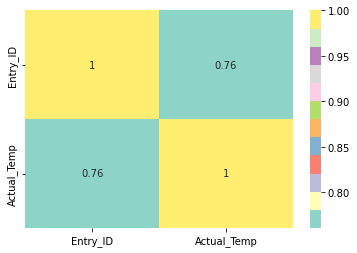

In [13]:
# create a heatmap for the correlation data

sns.heatmap(data = Original_Feeds.corr(), annot=True, cmap='Set3')

In [14]:
# split the training and test data 

x_train, x_test, y_train, y_test = train_test_split(
Original_Feeds[['Entry_ID']],Original_Feeds[['Actual_Temp']])

In [15]:
# create the model and fit the training data

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [16]:
# score the testing data

model.score(x_test, y_test)

0.5769119417163611

In [17]:
# score the training data

model.score(x_train, y_train)

0.5795033775532998

In [18]:
# make the predictions

y_predicted = model.predict(x_test)
predicted = pd.DataFrame(y_predicted, columns = ['Predicted_Temp'])

In [19]:
# join the predicted data with the original data

Final = predicted.join([x_test.reset_index(drop=True),
                        y_test.reset_index(drop=True)])
Final.head()

,Predicted_Temp,Entry_ID,Actual_Temp
0,19.212690,20904,19.7500
1,17.613162,8327,18.0625
2,16.693787,1098,17.0000
3,17.330317,6103,17.7500
4,17.731438,9257,17.4375


In [20]:
# calculate the residuals and store them in a column

Final['Residual'] = Final.Actual_Temp - Final.Predicted_Temp
Final

,Predicted_Temp,Entry_ID,Actual_Temp,Residual
0,19.212690,20904,19.7500,0.537310
1,17.613162,8327,18.0625,0.449338
2,16.693787,1098,17.0000,0.306213
3,17.330317,6103,17.7500,0.419683
4,17.731438,9257,17.4375,-0.293938
...,...,...,...,...
7426,19.791353,25454,19.1875,-0.603853
7427,16.969765,3268,15.0625,-1.907265
7428,19.090217,19941,20.0000,0.909783
7429,20.285061,29336,19.6875,-0.597561


<AxesSubplot:xlabel='Residual', ylabel='Density'>

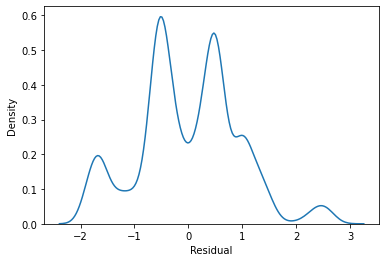

In [21]:
# create a KDE plot for the residuals

sns.kdeplot(data=Final, x='Residual')

In [22]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7431 entries, 0 to 7430
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Predicted_Temp  7431 non-null   float64
 1   Entry_ID        7431 non-null   int64  
 2   Actual_Temp     7431 non-null   float64
 3   Residual        7431 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 232.3 KB


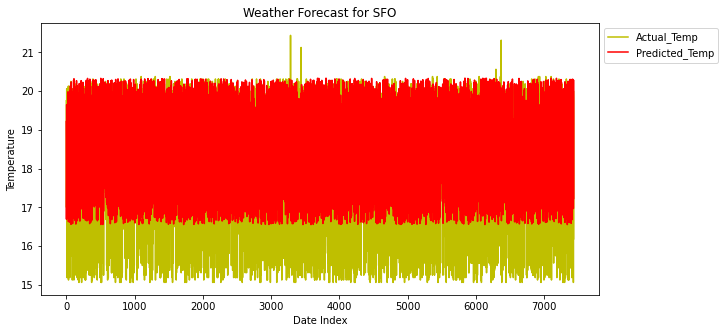

In [23]:
# Line Plot

fig = plt.figure(figsize=(10,5))

plt.plot(Final['Actual_Temp'],label='Actual_Temp',color='y')
plt.plot(Final['Predicted_Temp'],label='Predicted_Temp',color='r')

plt.title('Weather Forecast for SFO')
plt.xlabel('Date Index')
plt.ylabel('Temperature')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

In [24]:
# https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b
# R Square/Adjusted R Square

from sklearn.metrics import r2_score

r2_score(Final['Actual_Temp'], Final['Predicted_Temp'])

0.5769119417163611

In [25]:
# Mean Square Error(MSE)/Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(Final['Actual_Temp'], Final['Predicted_Temp'])
print(f'MSE: {mse}')
print(f'RMSE: {math.sqrt(mse)}')

MSE: 0.877148629883417
RMSE: 0.9365621334879053


In [26]:
# Mean Absolute Error(MAE)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Final['Actual_Temp'], Final['Predicted_Temp'])
print(f'MAE: {mae}')

MAE: 0.7635186382681641


In [27]:
# To check two day data

Data_Per_Day = Original_Feeds.query("Days_Of_Week == 'Monday'")
Data_Per_Day

,Date_Time_Created,Date,Time,Days_Of_Week,Entry_ID,Actual_Temp
43,2023-03-06 00:04:34+00:00,2023-03-06,00:04:34,Monday,44,19.0625
44,2023-03-06 00:04:50+00:00,2023-03-06,00:04:50,Monday,45,19.1250
45,2023-03-06 00:05:06+00:00,2023-03-06,00:05:06,Monday,46,19.1250
46,2023-03-06 00:05:22+00:00,2023-03-06,00:05:22,Monday,47,19.1250
47,2023-03-06 00:05:37+00:00,2023-03-06,00:05:37,Monday,48,19.0625
...,...,...,...,...,...,...
17513,2023-03-13 23:58:43+00:00,2023-03-13,23:58:43,Monday,17514,20.1250
17514,2023-03-13 23:58:59+00:00,2023-03-13,23:58:59,Monday,17515,20.0625
17515,2023-03-13 23:59:15+00:00,2023-03-13,23:59:15,Monday,17516,20.0625
17516,2023-03-13 23:59:31+00:00,2023-03-13,23:59:31,Monday,17517,20.0625


In [28]:
# split the training and test data 

x_train, x_test, y_train, y_test = train_test_split(
Data_Per_Day[['Entry_ID']],Data_Per_Day[['Actual_Temp']])

In [29]:
# create the model and fit the training data

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
# score the testing data

model.score(x_test, y_test)

0.6760141337451251

In [31]:
# score the training data

model.score(x_train, y_train)

0.6105701724746113

In [32]:
# make the predictions

y_predicted = model.predict(x_test)
predicted = pd.DataFrame(y_predicted, columns = ['Predicted_Temp'])

In [33]:
# join the predicted data with the original data

Final_Data = predicted.join([x_test.reset_index(drop=True),
                        y_test.reset_index(drop=True)])
Final_Data.head()

,Predicted_Temp,Entry_ID,Actual_Temp
0,20.050958,16846,20.1250
1,20.045784,16746,20.0000
2,20.079000,17388,20.1250
3,20.033367,16506,19.8125
4,20.072481,17262,20.1875


In [34]:
# calculate the residuals and store them in a column

Final_Data['Residual'] = Final_Data.Actual_Temp - Final_Data.Predicted_Temp
Final_Data.head()

,Predicted_Temp,Entry_ID,Actual_Temp,Residual
0,20.050958,16846,20.1250,0.074042
1,20.045784,16746,20.0000,-0.045784
2,20.079000,17388,20.1250,0.046000
3,20.033367,16506,19.8125,-0.220867
4,20.072481,17262,20.1875,0.115019


<AxesSubplot:xlabel='Residual', ylabel='Density'>

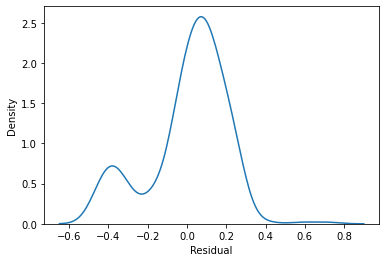

In [35]:
# create a KDE plot for the residuals

sns.kdeplot(data=Final_Data, x='Residual')

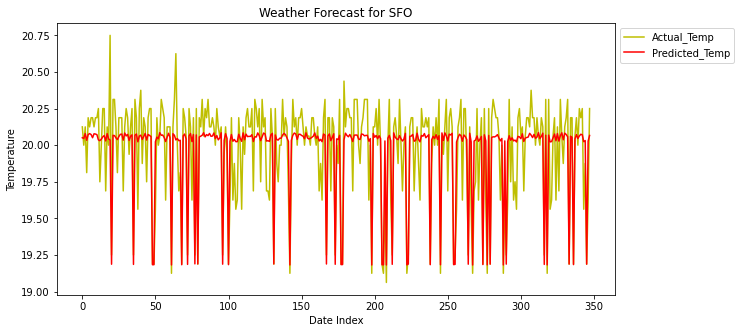

In [36]:
# Line Plot

fig = plt.figure(figsize=(10,5))

plt.plot(Final_Data['Actual_Temp'],label='Actual_Temp',color='y')
plt.plot(Final_Data['Predicted_Temp'],label='Predicted_Temp',color='r')

plt.title('Weather Forecast for SFO')
plt.xlabel('Date Index')
plt.ylabel('Temperature')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()